In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/Testing.csv')

# Drop the URL column
df.drop(columns=['url'], inplace=True)

# Save the modified DataFrame back to a CSV file
df.to_csv('/content/Testing_modified.csv', index=False)

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/Testing_modified.csv'
df = pd.read_csv(file_path)

# Map the final class to 0 and 1
df['status'] = df['status'].map({'legitimate': 0, 'phishing': 1})

# Save the modified dataset
df.to_csv(file_path, index=False)

In [ ]:
print(df.isnull().sum())

length_url         0
length_hostname    0
ip                 0
nb_dots            0
nb_hyphens         0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 88, dtype: int64


Feature ranking:
1. google_index: 0.1555
2. page_rank: 0.1125
3. nb_hyperlinks: 0.0818
4. web_traffic: 0.0754
5. nb_www: 0.0350
6. phish_hints: 0.0333
7. domain_age: 0.0321
8. longest_word_path: 0.0292
9. ratio_intHyperlinks: 0.0245
10. ratio_extHyperlinks: 0.0227
11. ratio_digits_url: 0.0217
12. safe_anchor: 0.0199
13. ratio_extRedirection: 0.0196
14. length_url: 0.0182
15. longest_words_raw: 0.0181
16. length_hostname: 0.0180
17. char_repeat: 0.0169
18. domain_in_title: 0.0168
19. links_in_tags: 0.0162
20. shortest_word_host: 0.0143
21. nb_dots: 0.0142
22. domain_registration_length: 0.0133
23. avg_word_path: 0.0132
24. avg_words_raw: 0.0123
25. length_words_raw: 0.0120
26. ratio_digits_host: 0.0104
27. avg_word_host: 0.0102
28. nb_slash: 0.0102
29. ip: 0.0099
30. shortest_word_path: 0.0094
31. longest_word_host: 0.0086
32. nb_hyphens: 0.0083
33. nb_eq: 0.0076
34. shortest_words_raw: 0.0070
35. nb_qm: 0.0055
36. ratio_extErrors: 0.0053
37. ratio_extMedia: 0.0048
38. ratio_intMedia: 0

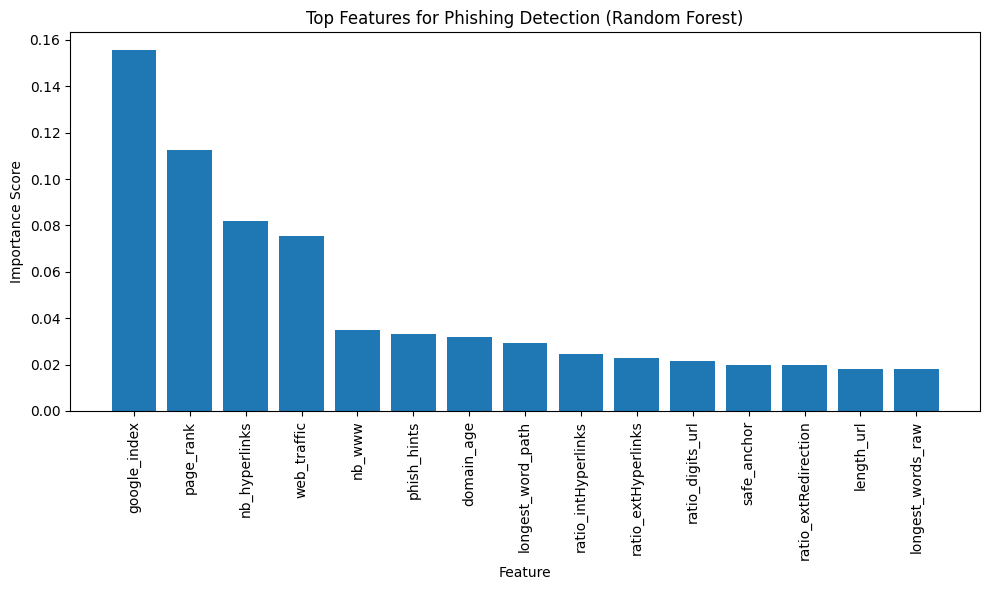


Model Performance with Selected Features:
Accuracy: 0.9430
Precision: 0.9380
Recall: 0.9545
F1-Score: 0.9462


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load dataset
df = pd.read_csv('/content/Testing_modified.csv')
X = df.drop('status', axis=1)  # Features
y = df['status']               # Target (0: legitimate, 1: phishing)

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Extract feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort indices in descending order

# Print feature ranking
print("Feature ranking:")
for i, (feature, importance) in enumerate(zip(X.columns[indices], importances[indices])):
    print(f"{i+1}. {feature}: {importance:.4f}")

# Select top N features (e.g., top 15)
top_n = 15
selected_features = X.columns[indices][:top_n]

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.title("Top Features for Phishing Detection (Random Forest)")
plt.bar(range(top_n), importances[indices][:top_n], align='center')
plt.xticks(range(top_n), selected_features, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

# Retrain model with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train_selected, y_train)

# Evaluate performance
y_pred = rf_selected.predict(X_test_selected)
print("\nModel Performance with Selected Features:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

# Save selected features (optional)
pd.DataFrame(selected_features).to_csv('selected_features.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Load your phishing dataset
df = pd.read_csv('/content/Testing_modified.csv')

# Separate features (X) and target (y)
X = df.drop('status', axis=1)
y = df['status']

# Train Random Forest to get feature importances
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Extract feature importances and sort them
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort indices in descending order

# Select top 10 features
top_n = 10
selected_features = X.columns[indices][:top_n].tolist()

# Create new dataset with top 10 features + target column
new_df = df[selected_features + ['status']]

# Save the new dataset
new_df.to_csv('phishing_dataset_top10_features.csv', index=False)

# Print confirmation
print("New dataset created with top 10 features:")
print(f"Selected features: {selected_features}")
print(f"New dataset shape: {new_df.shape}")

New dataset created with top 10 features:
Selected features: ['google_index', 'page_rank', 'nb_hyperlinks', 'web_traffic', 'domain_age', 'nb_www', 'phish_hints', 'longest_word_path', 'ratio_extHyperlinks', 'ratio_digits_url']
New dataset shape: (3772, 11)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('phishing_dataset_top10_features.csv')
print("Class distribution:\n", df['status'].value_counts())

Class distribution:
 status
1    1886
0    1886
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Load your dataset
# Ensure your DataFrame is named `df`, and "target" is the label column name.
# Replace it with your actual file path and target column.
df = pd.read_csv("/content/phishing_dataset_top10_features.csv")

# Split features and target
X = df.drop(columns=["status"])  # Drop the target column to get features
y = df["status"]

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Print the evaluation metrics
print("Random Forest Model Performance:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%\n")

# Confusion Matrix and Classification Report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Random Forest Model Performance:
Accuracy: 94.32%
Precision: 94.38%
Recall: 94.26%
F1-Score: 94.32%

Confusion Matrix:
[[723  43]
 [ 44 722]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       766
           1       0.94      0.94      0.94       766

    accuracy                           0.94      1532
   macro avg       0.94      0.94      0.94      1532
weighted avg       0.94      0.94      0.94      1532



In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=cae4d271065a03f0e6a605c69168893cc871a746b35eec5751808f0031c09c9c
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import lime
import lime.lime_tabular
import joblib

# Load the dataset
data = pd.read_csv('/content/phishing_dataset_top10_features.csv')

# Separate features and target
X = data.drop('status', axis=1)
y = data['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X.columns,
    class_names=['Benign', 'Phishing'],
    discretize_continuous=True
)

# Generate explanations for each instance in the dataset
explanations = []

for i in range(len(X)):
    exp = explainer.explain_instance(X.values[i], model.predict_proba, num_features=8)
    explanation_list = exp.as_list()
    paragraph = f"The model predicts this URL as {'phishing' if y.iloc[i] == 1 else 'benign'} because: "
    for feature, weight in explanation_list:
        paragraph += f"{feature} contributes {'positively' if weight > 0 else 'negatively'} with a weight of {abs(weight):.2f}. "
    explanations.append(paragraph)

# Add explanations to the dataset
data['Explanation'] = explanations

# Save the new dataset with explanations
data.to_csv('updated_standardized_dataset_with_explanations.csv', index=False)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fi

In [ ]:
import pandas as pd

# ✅ Load dataset
file_path = "/content/Testing.csv"  # Replace with your actual file
df = pd.read_csv(file_path)

# ✅ Define required columns
selected_columns = [
    "google_index", "page_rank", "nb_hyperlinks", "web_traffic",
    "nb_www", "domain_age", "ratio_extHyperlinks", "ratio_intHyperlinks",
    "phish_hints", "safe_anchor", "status"  # Include final class
]

# ✅ Extract only required columns
df_selected = df[selected_columns]

# ✅ Save the new dataset (Optional)
df_selected.to_csv("filtered_dataset.csv", index=False)

print("✅ Extracted dataset shape:", df_selected.shape)
print("✅ Sample Data:\n", df_selected.head())
